In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [15]:
import pandas as pd
dataframe_raw = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
print(dataframe_raw.describe())
print(dataframe_raw.info())


              DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  9.553390e+05  955339.000000  955339.000000  955339.000000   
mean   2.191355e+08    1338.453032      10.718033    1118.243545   
std    1.261589e+07     652.186527       6.100431     610.098189   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.105125e+08     900.000000       6.000000     621.000000   
50%    2.207106e+08    1420.000000      11.000000    1142.000000   
75%    2.307171e+08    1900.000000      16.000000    1618.000000   
max    2.499187e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  955339.000000  955339.000000  955339.000000  955327.000000   
mean        1.407805     500.667710      29.383110     306.255200   
std         0.491427     206.867837      21.909695     217.844195   
min         1.000000     110.000000      -4.000000     101.000000   
25%         1.000000     331.000000       

<Figure size 4000x3400 with 0 Axes>

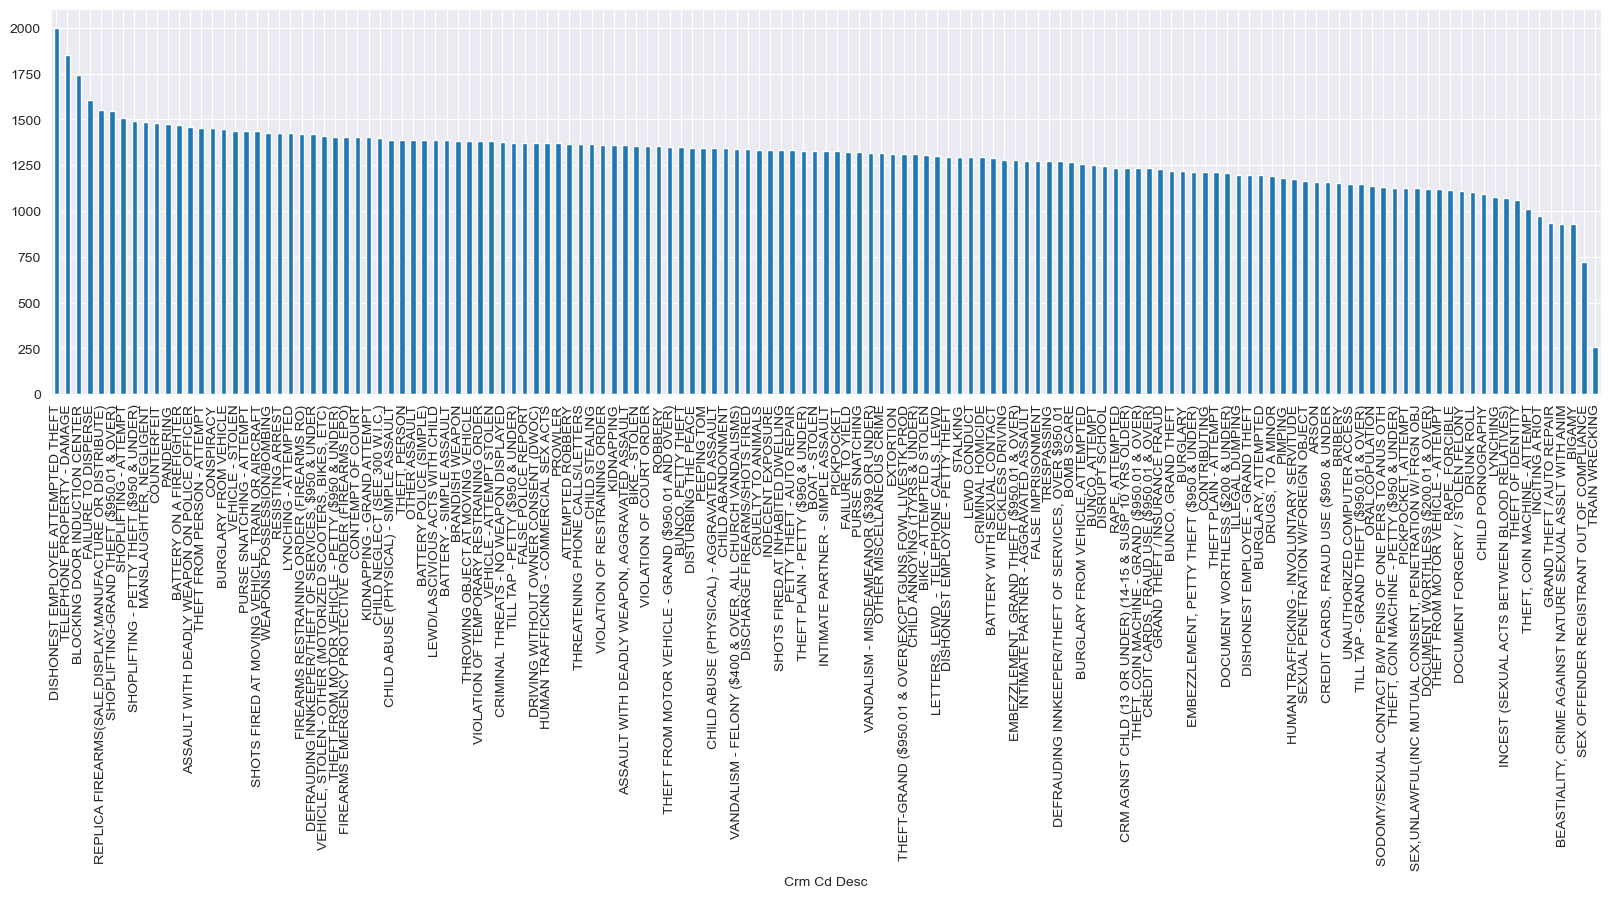

<Figure size 4000x3400 with 0 Axes>

In [64]:
import pandas as pd
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.groupby("Crm Cd Desc")["TIME OCC"].mean().sort_values(ascending=False).plot(kind="bar")
plt.figure(figsize=(40, 34))

In [66]:
df["Crm Cd Desc"].value_counts(normalize=True, sort=True)*100

Crm Cd Desc
VEHICLE - STOLEN                                           10.952343
BATTERY - SIMPLE ASSAULT                                    7.806967
BURGLARY FROM VEHICLE                                       6.192043
THEFT OF IDENTITY                                           6.181471
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6.063711
                                                             ...    
BLOCKING DOOR INDUCTION CENTER                              0.000628
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)          0.000523
DISHONEST EMPLOYEE ATTEMPTED THEFT                          0.000419
FIREARMS RESTRAINING ORDER (FIREARMS RO)                    0.000419
TRAIN WRECKING                                              0.000105
Name: proportion, Length: 139, dtype: float64

In [34]:
import pandas as pd
Crm_Cd_Desc = df.groupby('Crm Cd Desc').size().sort_values(ascending=False)
print(Crm_Cd_Desc .head(10))

Crm Cd Desc
VEHICLE - STOLEN                                           104632
BATTERY - SIMPLE ASSAULT                                    74583
BURGLARY FROM VEHICLE                                       59155
THEFT OF IDENTITY                                           59054
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     57929
BURGLARY                                                    57573
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              53271
THEFT PLAIN - PETTY ($950 & UNDER)                          49065
INTIMATE PARTNER - SIMPLE ASSAULT                           46657
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             37525
dtype: int64


In [ ]:
Based off of this we notice that a common crime is vechile theft. Another crime that is happens a lot is Batterym and Burgarly from a vehicle. 

<Figure size 4000x3400 with 0 Axes>

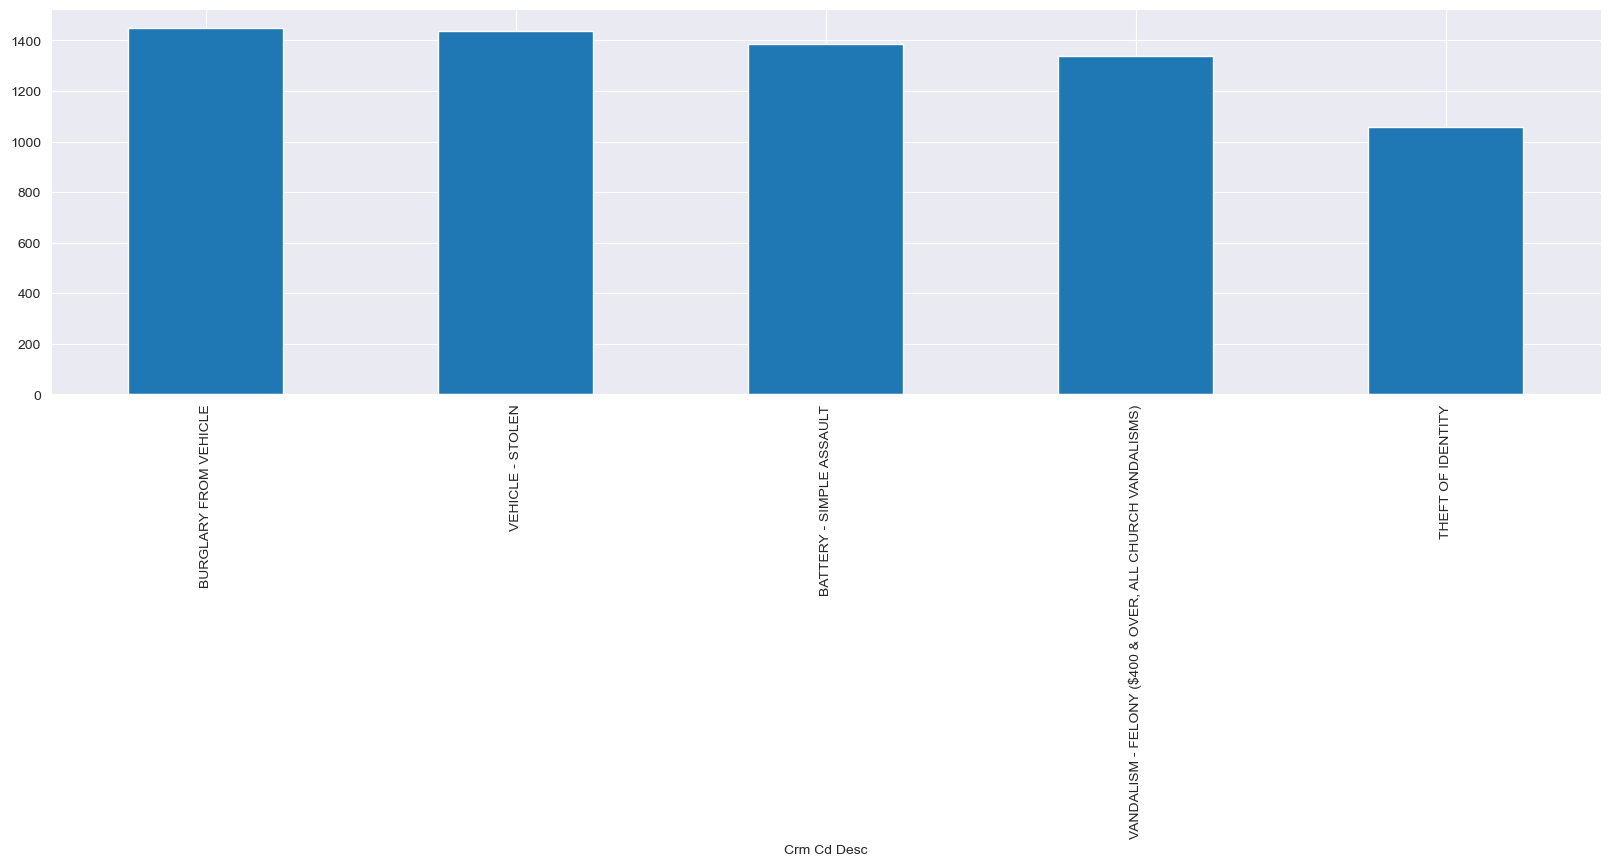

<Figure size 4000x3400 with 0 Axes>

In [70]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 

List_of_Variables = [
    "VEHICLE - STOLEN",
    "BATTERY - SIMPLE ASSAULT",
    "BURGLARY FROM VEHICLE",
    "THEFT OF IDENTITY",
    "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"
]
df_filtered = df[df["Crm Cd Desc"].isin(List_of_Variables)]
df_filtered.groupby("Crm Cd Desc")["TIME OCC"].mean().sort_values(ascending=False).plot(kind="bar")
plt.figure(figsize=(40, 34))

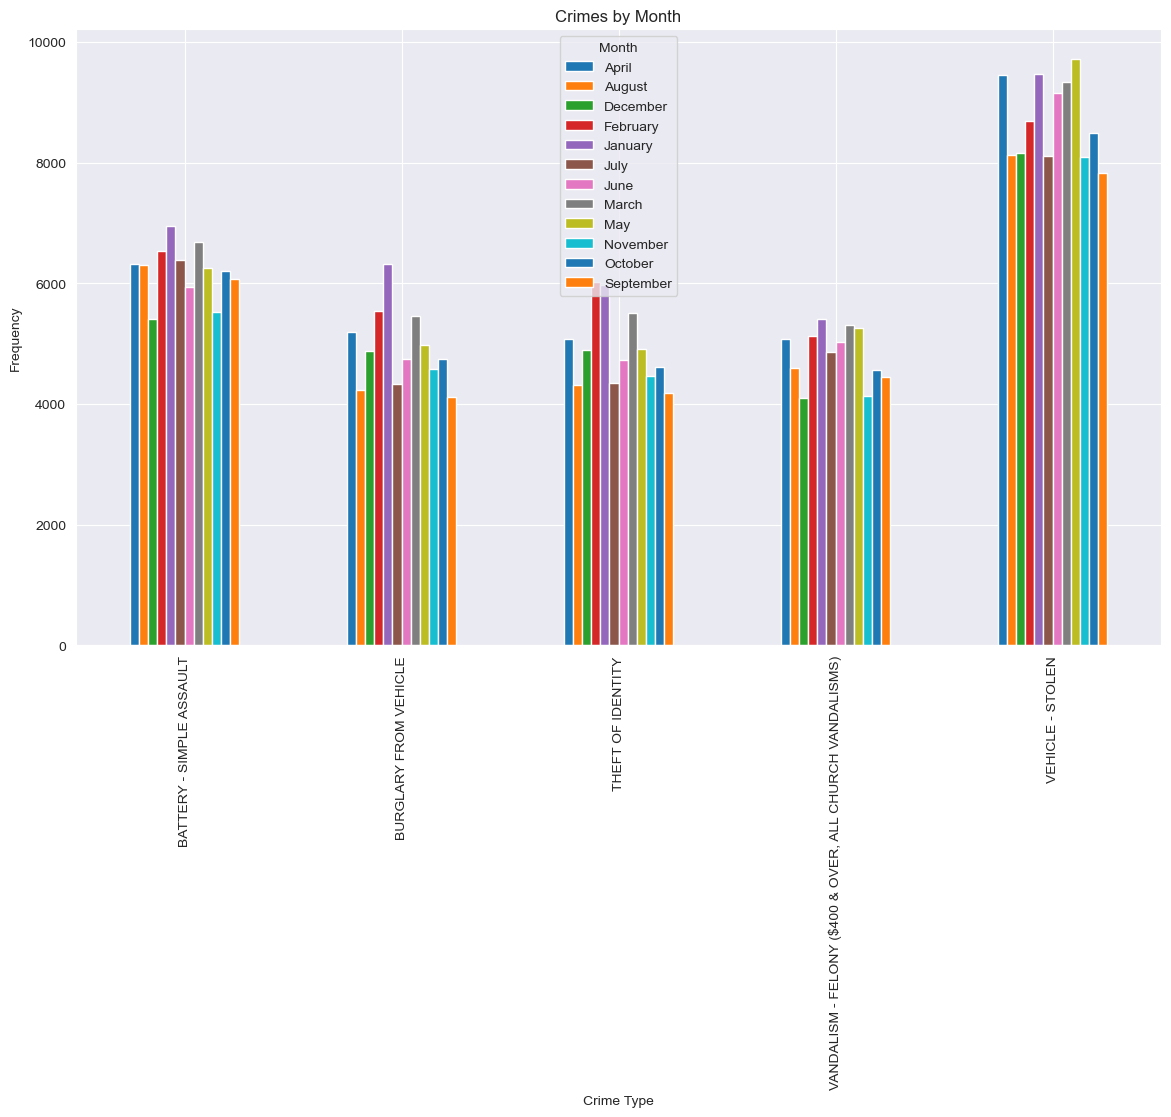

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')


df_filtered.loc[:, 'Month'] = df_filtered["DATE OCC"].dt.month_name()
crime_monthly = df_filtered.groupby(["Crm Cd Desc", "Month"]).size().unstack(fill_value=0)
crime_monthly.plot(kind="bar", figsize=(14, 8))

plt.title('Crimes by Month')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.show()



In [ ]:
High volume crime tends to be high year round, but September tends to be on the lower end, and April, January, March seem to be higher in high volume crime.
We can start givinbg patrols more hours in those months in order to lower the crime rates in those months. This will even out and lower the crime rate by
the end of the year.

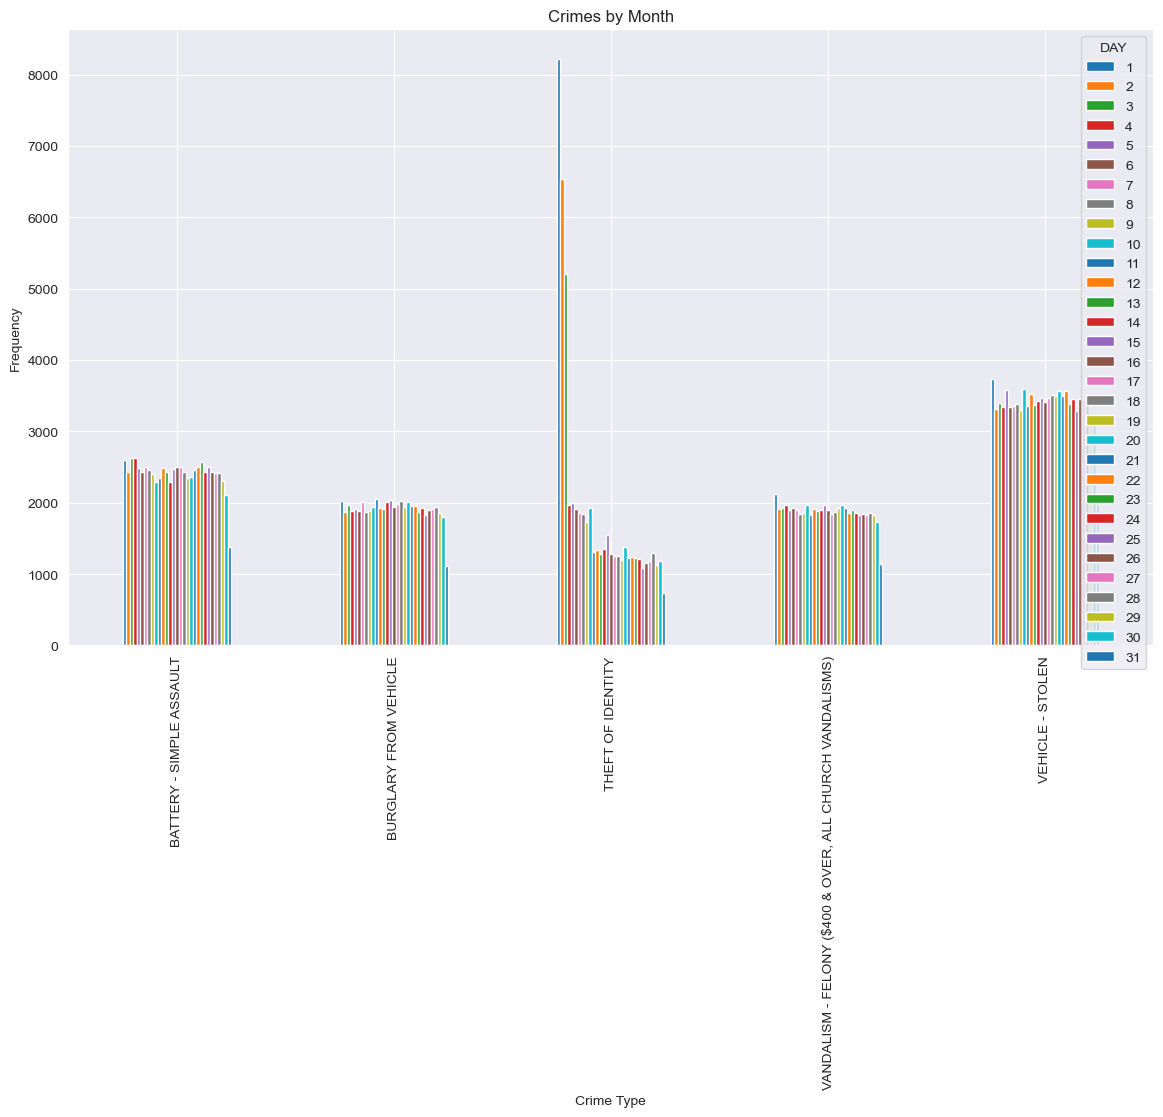

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

crime_monthly = df_filtered.groupby(["Crm Cd Desc", "DAY"]).size().unstack(fill_value=0)
crime_monthly.plot(kind="bar", figsize=(14, 8))

plt.title('Crimes by Month')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Identity theft has occured the most on the first day of the month by a huge margin. Identity theft also has been a problem on day 2, and 3 of the month.
Every other crime seems to be even when it comes to the days of the month, but the first day seems to have a higher endge for all of them(not by much).
We can start adding more patrol hours on the first few days of the month in order to reduce the crime.

In [128]:
import pandas as pd
crime_by_area = df.groupby('AREA NAME').size().sort_values(ascending=False)
print(crime_by_area.head(10))



AREA NAME
Central        64737
77th Street    59719
Pacific        55792
Southwest      54129
Hollywood      50035
N Hollywood    48556
Southeast      48127
Olympic        47840
Newton         47125
Wilshire       45734
dtype: int64


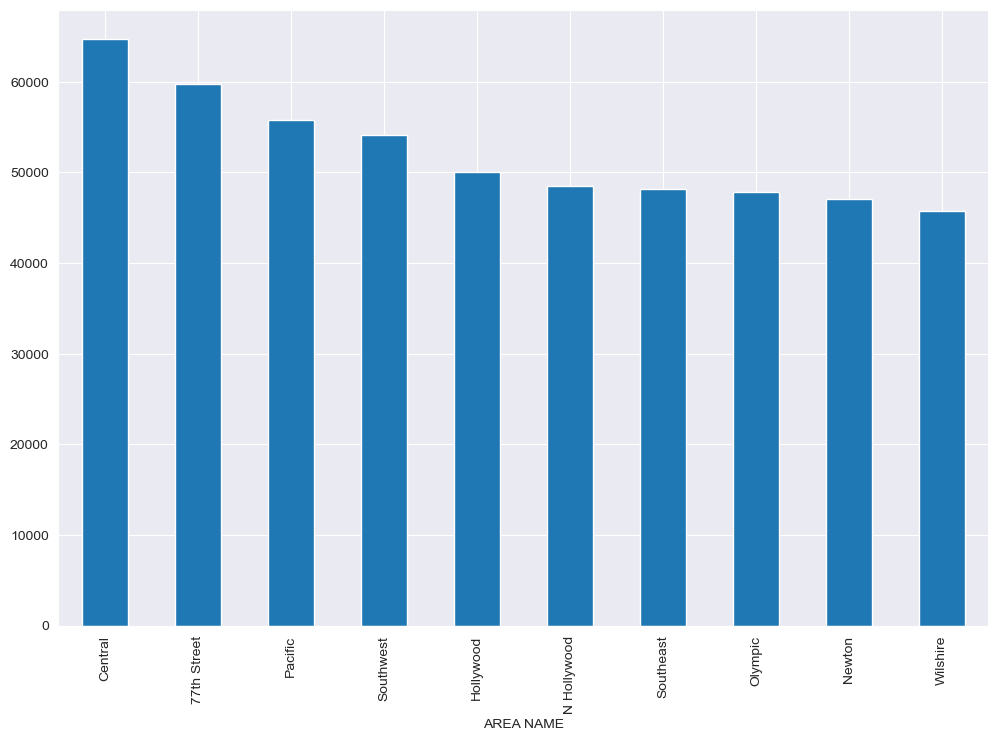

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

crime_by_area = df.groupby('AREA NAME').size().sort_values(ascending=False)
crime_by_area.head(10).plot(kind='bar',figsize=(12, 8))

plt.show()

In [ ]:
All these areas have high crime rates. Instead of allocating police officers in north California we should start relocating more to Central,77t Street,
Pacfic, both Hollywoods, and the Southwest.

In [40]:
import pandas as pd
crime_by_area_and_type = df.groupby(['AREA NAME','Crm Cd Desc']).size().sort_values(ascending=False)
print(crime_by_area_and_type.head(10))

AREA NAME    Crm Cd Desc                                   
Central      BURGLARY FROM VEHICLE                             8860
77th Street  VEHICLE - STOLEN                                  8042
Newton       VEHICLE - STOLEN                                  7678
Central      BATTERY - SIMPLE ASSAULT                          6782
Southeast    VEHICLE - STOLEN                                  6553
Southwest    VEHICLE - STOLEN                                  6059
Pacific      VEHICLE - STOLEN                                  5973
77th Street  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    5889
Hollenbeck   VEHICLE - STOLEN                                  5637
Harbor       VEHICLE - STOLEN                                  5630
dtype: int64


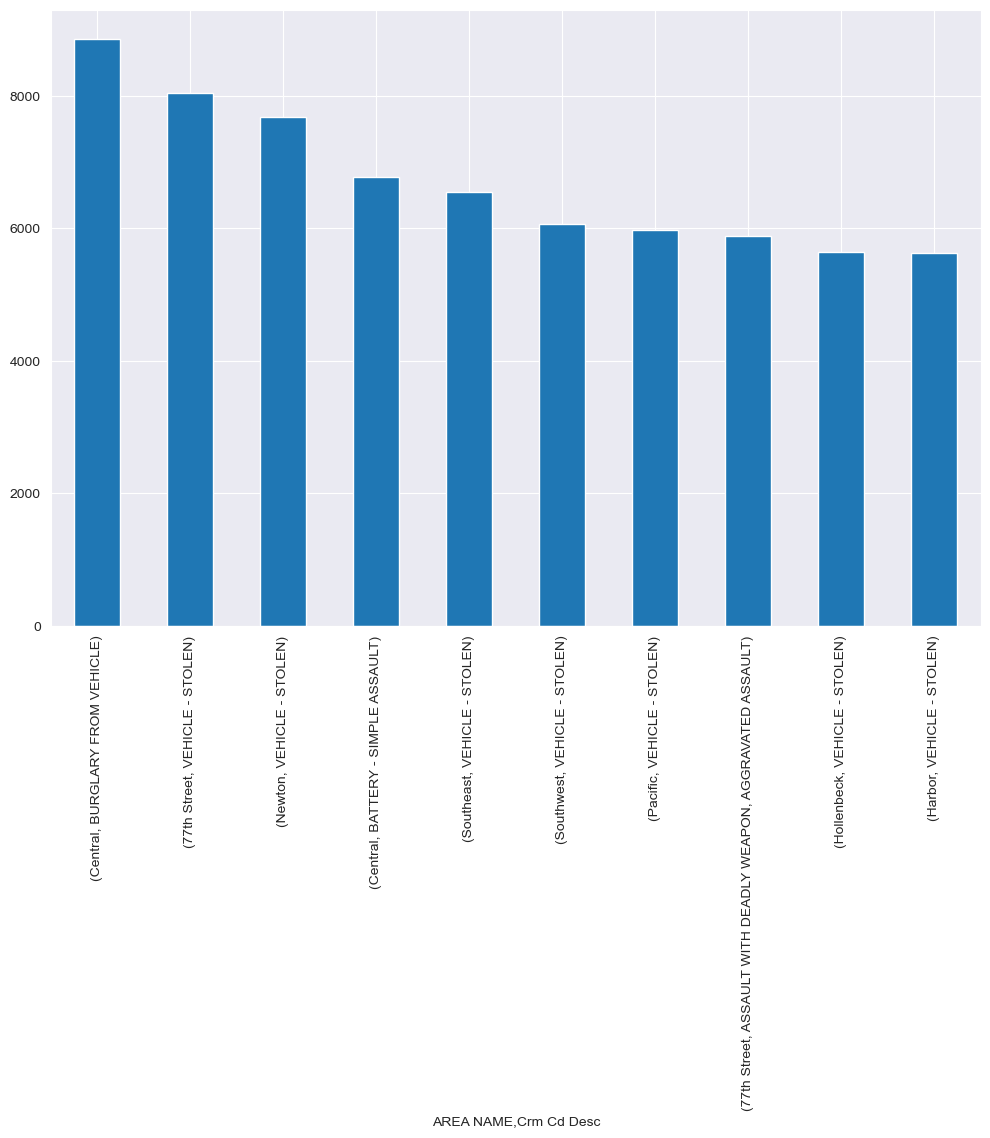

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

crime_by_area_and_type = df.groupby(['AREA NAME','Crm Cd Desc']).size().sort_values(ascending=False)
crime_by_area_and_type.head(10).plot(kind='bar',figsize=(12, 8))
plt.show()


In [ ]:
There are a lot of  high volume crime happening in Centeral, and 77th Street. We must reallocate our resources to those areas so we can prevent crimes 
like this and lower the crime rate.

In [96]:
import pandas as pd
List_of_Variables = [
    "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH",
    "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",
    "BATTERY WITH SEXUAL CONTACT",
    "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE",
    "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
    "CRIMINAL HOMICIDE",
    "MANSLAUGHTER, NEGLIGENT",
    "RAPE, FORCIBLE"   
]
df_Crime_Severity = df[df["Crm Cd Desc"].isin(List_of_Variables)]
Crime_Severity = df_Crime_Severity.groupby('Crm Cd Desc').size().sort_values(ascending=False)
print(Crime_Severity.head(30))

Crm Cd Desc
BATTERY WITH SEXUAL CONTACT                                 4123
RAPE, FORCIBLE                                              3719
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                     3551
CRIMINAL HOMICIDE                                           1557
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ    1064
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                    961
SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH      526
MANSLAUGHTER, NEGLIGENT                                        8
dtype: int64


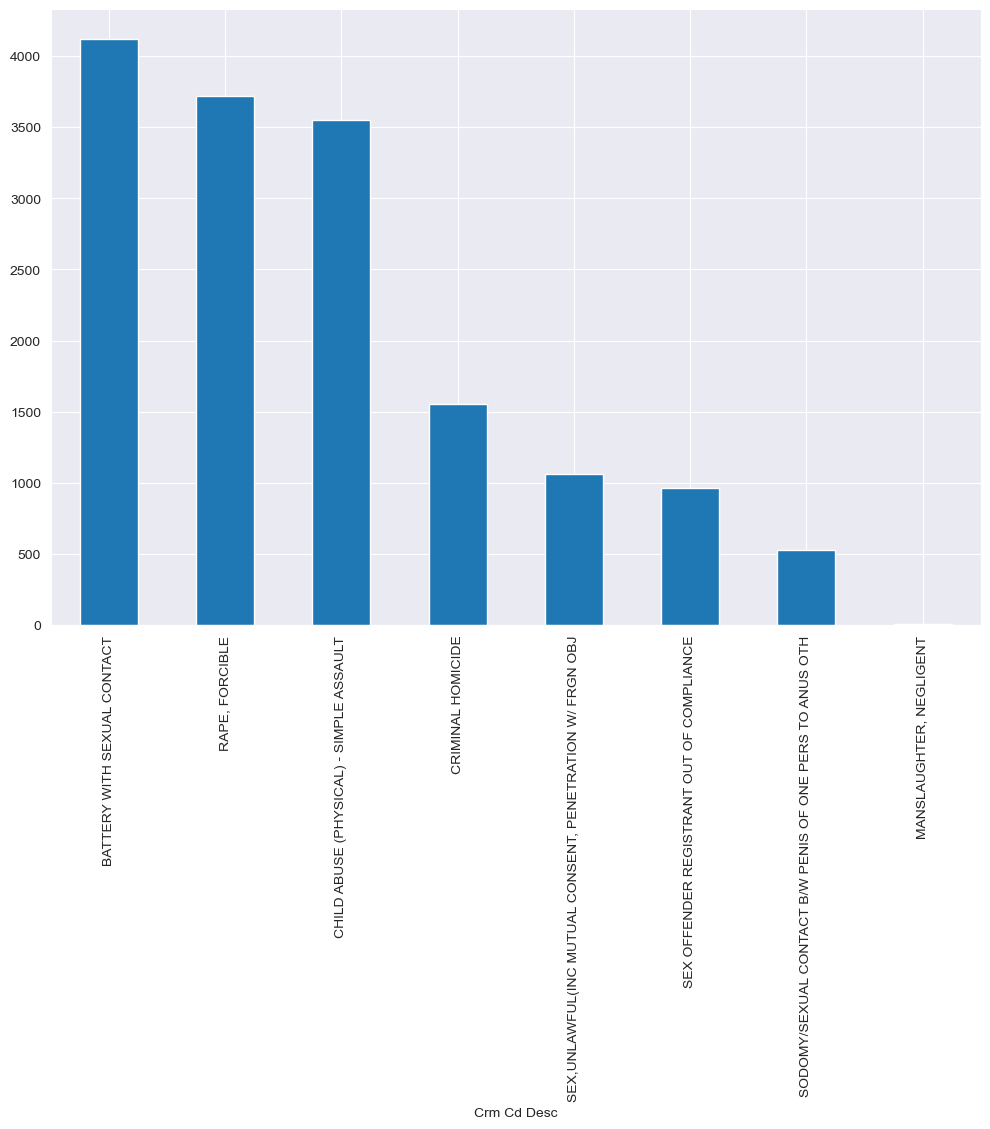

In [98]:
import pandas as pd

List_of_Variables = [
    "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH",
    "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",
    "BATTERY WITH SEXUAL CONTACT",
    "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE",
    "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
    "CRIMINAL HOMICIDE",
    "MANSLAUGHTER, NEGLIGENT",
    "RAPE, FORCIBLE"   
]
df_Crime_Severity = df[df["Crm Cd Desc"].isin(List_of_Variables)]
Crime_Severity = df_Crime_Severity.groupby('Crm Cd Desc').size().sort_values(ascending=False)
Crime_Severity.head(10).plot(kind='bar',figsize=(12, 8))
plt.show()

In [ ]:
BATTERY WITH SEXUAL CONTACT, BATTERY WITH SEXUAL CONTACT, BATTERY WITH SEXUAL CONTACT are all high. We need to focus on these severe not only to lower the percentage 
but to lower the percentage of horrible crimes.

In [86]:
import pandas as pd
List_of_Variables = [
    "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH",
    "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",
    "BATTERY WITH SEXUAL CONTACT",
    "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE",
    "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
    "CRIMINAL HOMICIDE",
    "MANSLAUGHTER, NEGLIGENT",
    "RAPE, FORCIBLE"   
]
df_Crime_Severity = df[df["Crm Cd Desc"].isin(List_of_Variables)]
Crime_Severity = df_Crime_Severity.groupby(['AREA NAME','Crm Cd Desc']).size().sort_values(ascending=False)
print(Crime_Severity.head(30))

AREA NAME    Crm Cd Desc                            
Central      BATTERY WITH SEXUAL CONTACT                393
Mission      CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT    387
Southeast    CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT    358
Central      RAPE, FORCIBLE                             355
Harbor       CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT    319
77th Street  RAPE, FORCIBLE                             315
             CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT    295
Hollywood    BATTERY WITH SEXUAL CONTACT                284
Southwest    CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT    260
Rampart      RAPE, FORCIBLE                             248
Southwest    BATTERY WITH SEXUAL CONTACT                246
77th Street  CRIMINAL HOMICIDE                          236
Hollywood    RAPE, FORCIBLE                             234
Pacific      BATTERY WITH SEXUAL CONTACT                234
Southwest    RAPE, FORCIBLE                             228
Olympic      BATTERY WITH SEXUAL CONTACT       

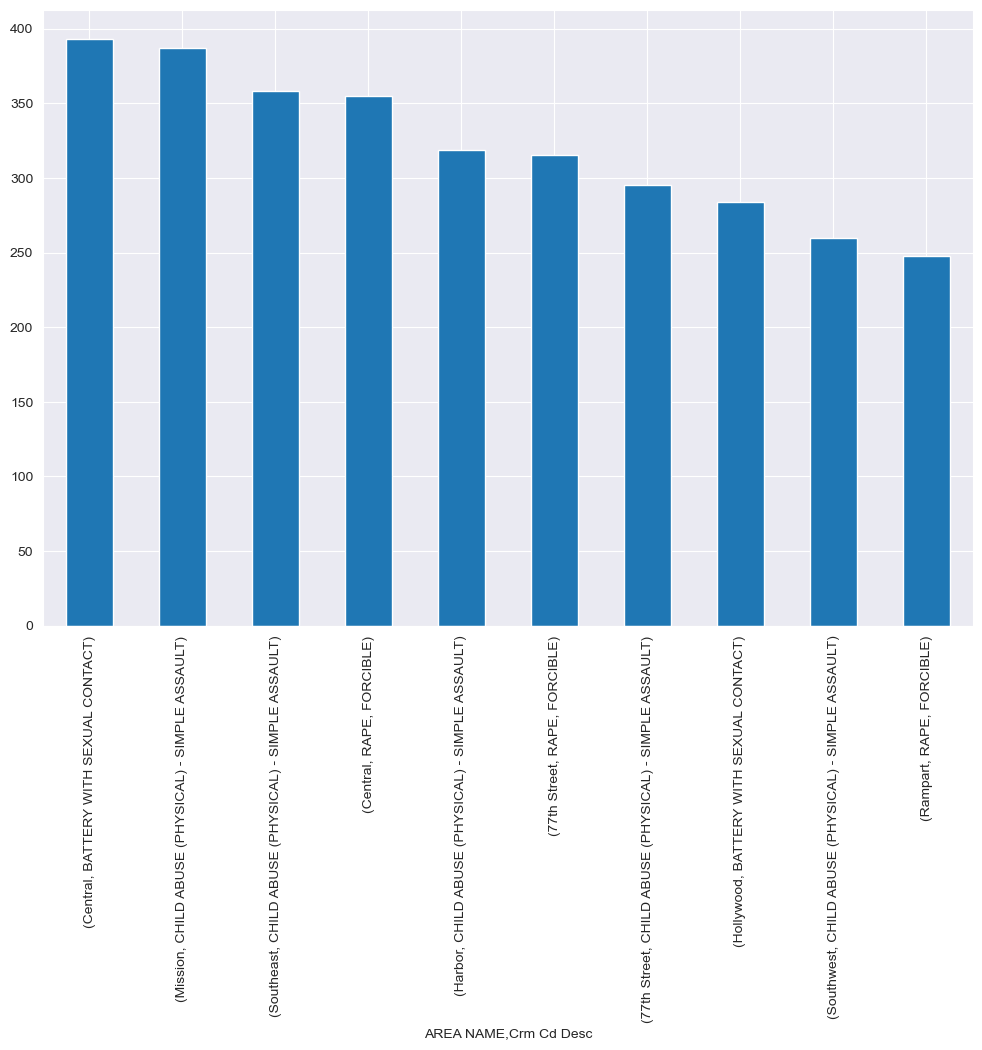

In [100]:
import pandas as pd
List_of_Variables = [
    "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH",
    "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",
    "BATTERY WITH SEXUAL CONTACT",
    "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE",
    "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
    "CRIMINAL HOMICIDE",
    "MANSLAUGHTER, NEGLIGENT",
    "RAPE, FORCIBLE"   
]
df_Crime_Severity = df[df["Crm Cd Desc"].isin(List_of_Variables)]
Crime_Severity = df_Crime_Severity.groupby(['AREA NAME','Crm Cd Desc']).size().sort_values(ascending=False)
Crime_Severity.head(10).plot(kind='bar',figsize=(12, 8))
plt.show()

In [ ]:
While these are severe crimes, they dont have much volume to lower the crime rate by a significant about.